In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
from mpl_toolkits.basemap import Basemap
from numpy import random
import warnings
warnings.filterwarnings("ignore")

### Review of lecture 21


In Lecture 21 we  

- Learned about gridding and contouring with matplotlib
- We applied the techniques to the Earth's topography and the magnetic field. 


#### In this lecture we will:

- We will work with directional data using rose diagrams and stereonets



### Directions 

Earth science is filled with directional data.  Glacial striations,  bedding planes, or geomagnetic field vectors are both  are forms of directional data.  Dealing with directional data is quite different than other kinds of data, like lists of numbers, and we need special plots.  And unless all the directions are in a single plane, we  need to project something that is inherently 3D onto a 2D plot.  

To get started, we will consider  directions in the horizontal plane, which are already 2D (no vertical component).  Examples would be current directions in ancient rivers, or the direction of wind on the surface of the Earth.  

One early fascination in Earth Science was the evidence for past glaciations.   There are many clues to past glaciations (moraines, eskers, U-shaped valleys, etc.), but one that stands out as an interesting example of directional data is glacial striations.  As glaciers flow over the surface of the Earth, they scratch it, making what are known as striations.  When the ice melts back (as it is doing very rapidly), the striations remain as clues to their past movements.  

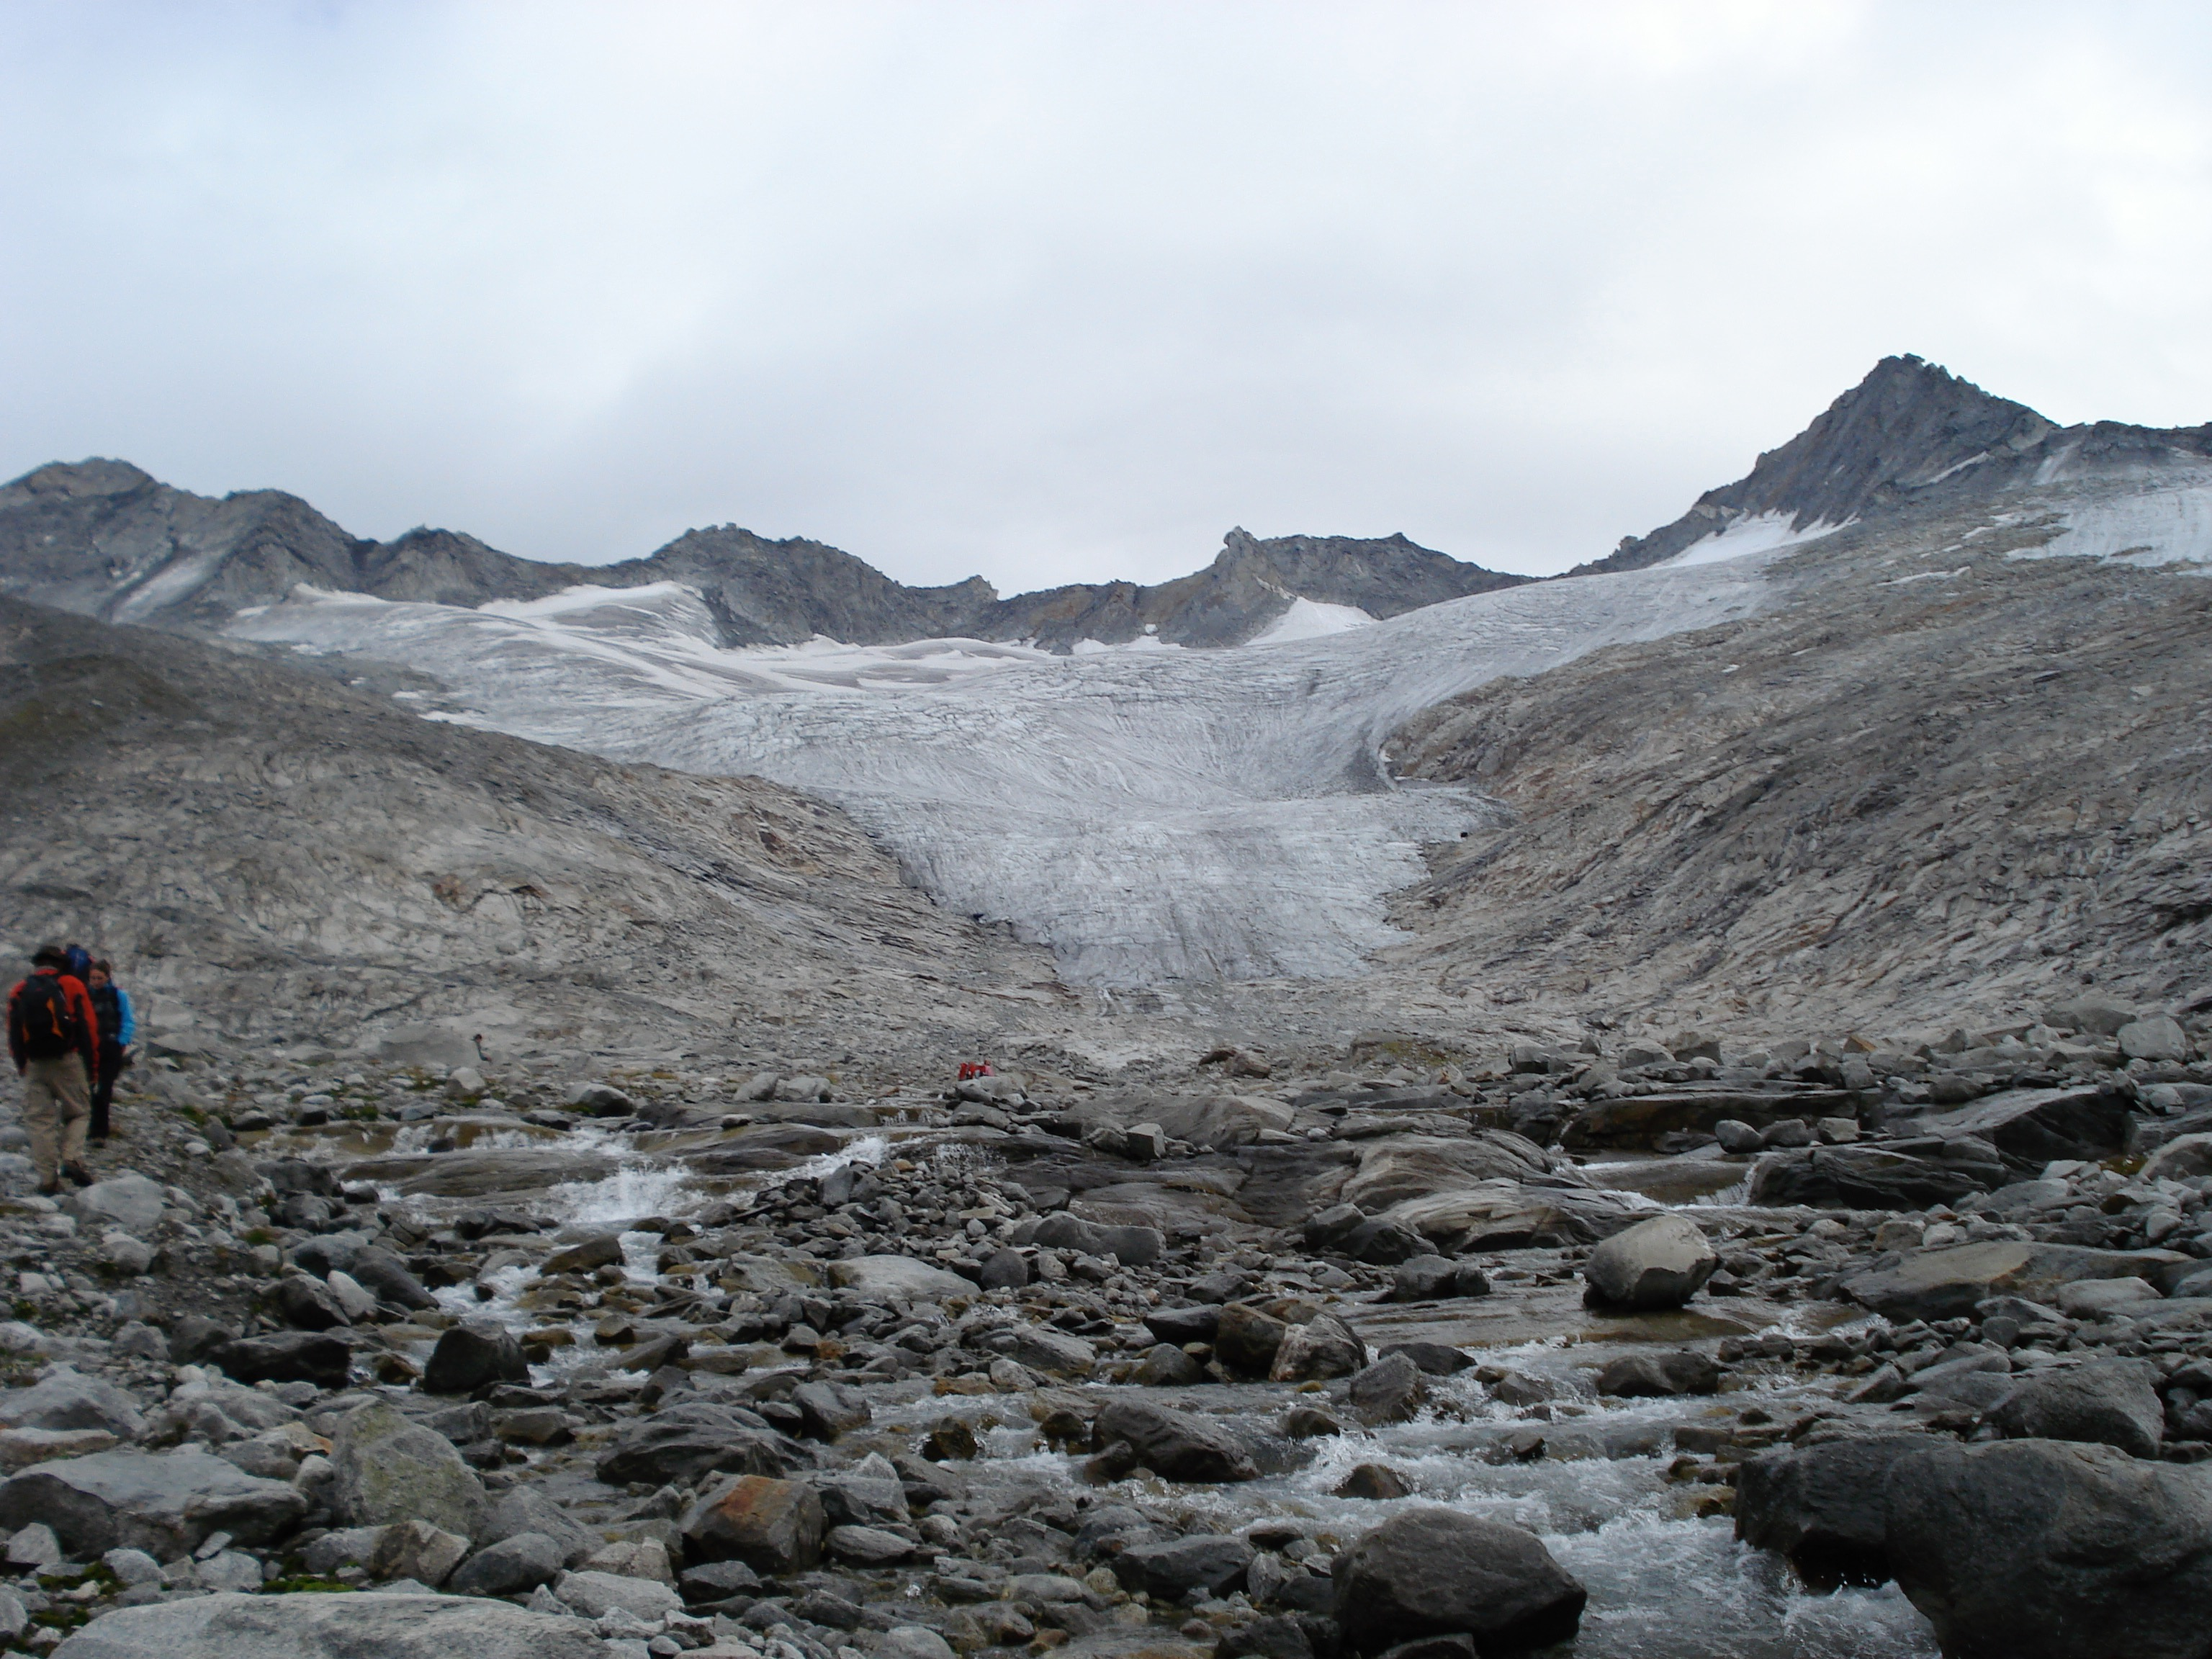

In [3]:
Image(filename='Figures/glacier.jpg')

_[Figure from a family vacation near where the "Iceman", Utzi, was found.  :)]_

There can be several generations of striations as the glaciers come and go.  Glaciologists measure their orientations with a compass.  Some striations will cut across others so you can work out the age relations.   

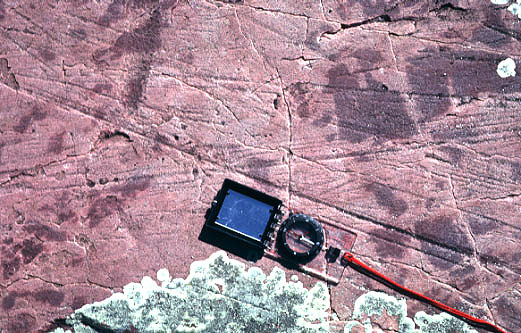

In [3]:
Image(filename='Figures/striations.jpg')

_[Figure from: http://academic.emporia.edu/aberjame/ice/lec01/lec1.htm.]_


While you can certainly plot directional data as a histogram, 2D directional data are  often plotted as a _rose diagram_.  Rose diagrams are like histograms, but around a circle.    

To learn about rose diagrams, we can 'make up'  some data like we did in Lecture 16 and 17.   In those lectures you learned how to simulate normally distributed data sets drawn from a distribution with some mean, $\mu$  and  a standard deviation ($\sigma$).  Now we want to apply this to make some simulated data for directions.  



### Application to glacial striations

Let's say that a glaciologist measured a bunch of striations from two different glaciations.  The youngest was oriented approximately 45$^{\circ}$ with a $\sigma$ of about 10$^{\circ}$ and an older set  set has a mean of 130$^{\circ}$ and a standard deviation of 15.  

To simulate this problem, we can simulate 100 fake data points for each of these situations using our old friend **random.normal( )**.    


In [4]:
striations_1=random.normal(45,10,100) # younger set
striations_2=random.normal(130,15,100) # older set

We can plot our two different data sets on a histogram:

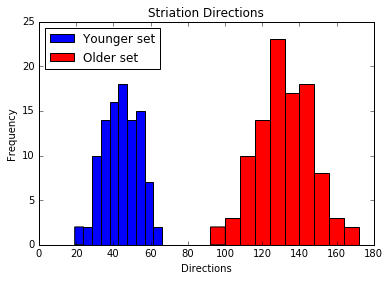

In [8]:
plt.hist(striations_1,facecolor='blue',label='Younger set') 
plt.hist(striations_2,facecolor='red',label='Older set') 
plt.xlabel('Directions')
plt.ylabel('Frequency')
plt.title('Striation Directions')
plt.legend(loc=2);

### Rose diagrams

Histograms, while lovely,  don't really give you a feel for the directions. As geologists, we like to plot things in a way that conveys the maximum in information for the minimum in effort on the part of the viewer.  2D directional data are much better represented as 'rose diagrams', which are really just histograms plotted around a circle. They are also known as _polar_ projections as they could be used to make a map of the Earth looking down at one of the poles.  

We will follow these steps: 

- For rose diagrams, we will create a  plot instance (called **fig**) with the **plt.subplot( )** function.  We make it a _polar_ plot by setting the **polar** keyword to 'True'. 
- The _polar_ type of subplot has funny coordinates set as default, at least for geologists.  The orientations go around counterclockwise instead of clockwise (like map directions). To make it seem more normal for geologists,  we have to switch around the directions to geographic coordinates.  We do this with the **fig.set_theta_direction(-1)** function where the '-1' tells **matplotlib** that we want the numbers to go around clockwise, instead of the default (which for some unknown reason goes counter clockwise).  
- We also have to put '0' at the top of the diagram (because it is 'North' in Earth Science).  We do that with the **fig.set_theta_zero_location('N')** call, which tells **matplotlib** to put 0 on top (instead of on the right side which is the default).  
-  We have to define some bins, sort of like histograms but around the face of the clock, and count up how many directions are in each bin.  We will use a bin size of 10$^{\circ}$.  Because we have to do this twice, we will make a function called **bincount()** out of the bin counting part.
- We will use the  plot function **plt.bar( )** which normally makes bar charts (remember lecture on the composition of the crust?), but will make rose diagrams if the plot is _polar_.
- Finally, we will plot the data on the figure instance. 

Let's start with the **bincount( )** function: 

In [9]:
def bincount(Azimuths,w): # function to count up directions in each bin.
    """
    Count up the number of azimuths in each bin of w width
    Inputs: 
    Azimuths: 1D array of directions (azimuths)
    w: bin width
    Returns: 
    thetas: bin bounds
    Ns: number of azimuths in each bin
    width: array of bin widths
    """
    Ns,thetas=[],[] # Ns is the count of azimuths in each bin and theta is the bin bound
    bins=np.arange(w,360,w) # make an array of bin bounds with width w
    t0=0 # lowest bound
    for t in bins: # step through the bins and count up the striations
        cnt=0
        for a in Azimuths: # check each azimuth in the array
            if a<t and a>t0: # if the shoe fits
                cnt+=1 # got one!
        if cnt>0: # if there are any azimuths in this bin
            Ns.append(cnt) # number of azimuths in this bin
            thetas.append(np.radians(t0)) # the azimuth of the lower bound - in radians!
        t0=t # increment lower bound
# make each bin w degrees wide and convert to radians!!! 
#   (special trick. you're welcome)
    width=np.ones(len(thetas))*w*np.pi/180.  # array of bin widths
    return thetas,Ns,width # bye-bye



Now we are ready to make the plot.  

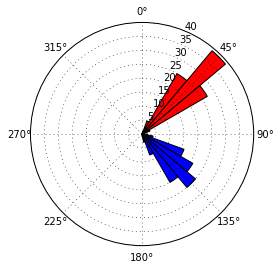

In [10]:
# make the figure instance
fig = plt.subplot(111, polar=True) # Specify polar axes
# set the coordinates the way we want them
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# call the bincount function with bin width of 10 degrees
theta_1,Ns,width=bincount(striations_1,10.)
# use the polar "bar" plot.   
fig.bar(theta_1, Ns, width=width, bottom=0,color='red')

# call the bincount function for the second set of directions
theta_2,Ns,width=bincount(striations_2,10.)
fig.bar(theta_2, Ns, width=width, bottom=0,color='blue') 
plt.polar([0],[1.2*max(Ns)]); # this sets the outer rim to be
     # 20% larger than the biggest bin




### Practice with rose diagrams
- NOAA collects wind directional data for the US which we can download and do whatever we like with it (decide whether or not to go sailing or surfing, for example).  We can also plot the data as a rose diagram.  :)
-  We downloaded data for May 14, 2017 (Mother's day) from this search:  http://www.ndbc.noaa.gov/radial_search.php?lat1=33N&lon1=117W&uom=E&dist=250&ot=A&time=1 and reformatted the file as a comma separated variable data file in  Datasets/WindDirections/wind.csv 
- Read in the data as a Pandas DataFrame.  Use df.head( ) to inspect the file first, to set the skiprows and header keywords appropriately.
- The wind directions are in the WDIR column.
- Use df.dropna( ) to get rid of the blank WDIR lines.
- Plot the WDIR data as a rose diagram.  

While rose diagrams are great for plotting directions that lie within the horizontal plane, most directional data in Earth Science do not fall in the horizontal plane.    There is some angle with respect to the horizontal. We will call that angle the 'plunge' (Pl in figure below) and the  angle in the horizontal plane with respect to true north is the 'azimuth' (Az).   



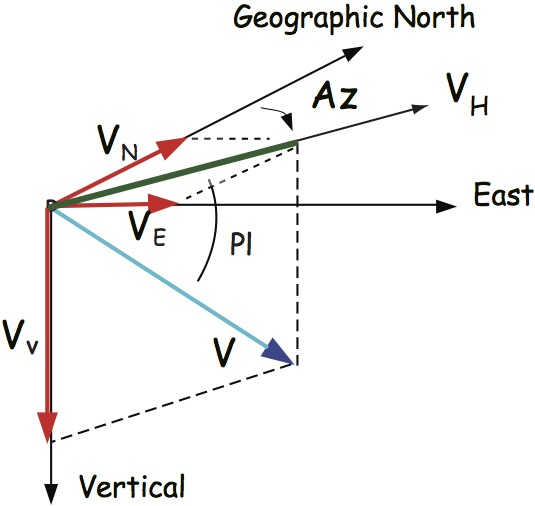

In [11]:
Image(filename='Figures/coordinates.jpg',width=300)

[Figure modified from Essentials of Paleomagnetism by Tauxe et al.,(2010): https://earthref.org/MagIC/books/Tauxe/Essentials/]


### Equal area and equal angle projections

Examples of directional data are locations on the surface of the Earth (latitude and longitude),  the poles to tilted beds,  magnetic field vectors,  axes of crystals in rocks, or focal mechanisms in seismology (those beach balls).  These data would not work as histograms or rose diagrams but require some way of mapping a 3D vector onto a 2D surface (like a piece of paper).  

There are many projections that can represent 3D vectors on a 2D plane, for example maps which you learned something about in Lecture 20.  Two other popular projections in Earth Science are _stereonets_ (Wulff or equal angle projections) and _equal area_ (or Schmidt) projections.  

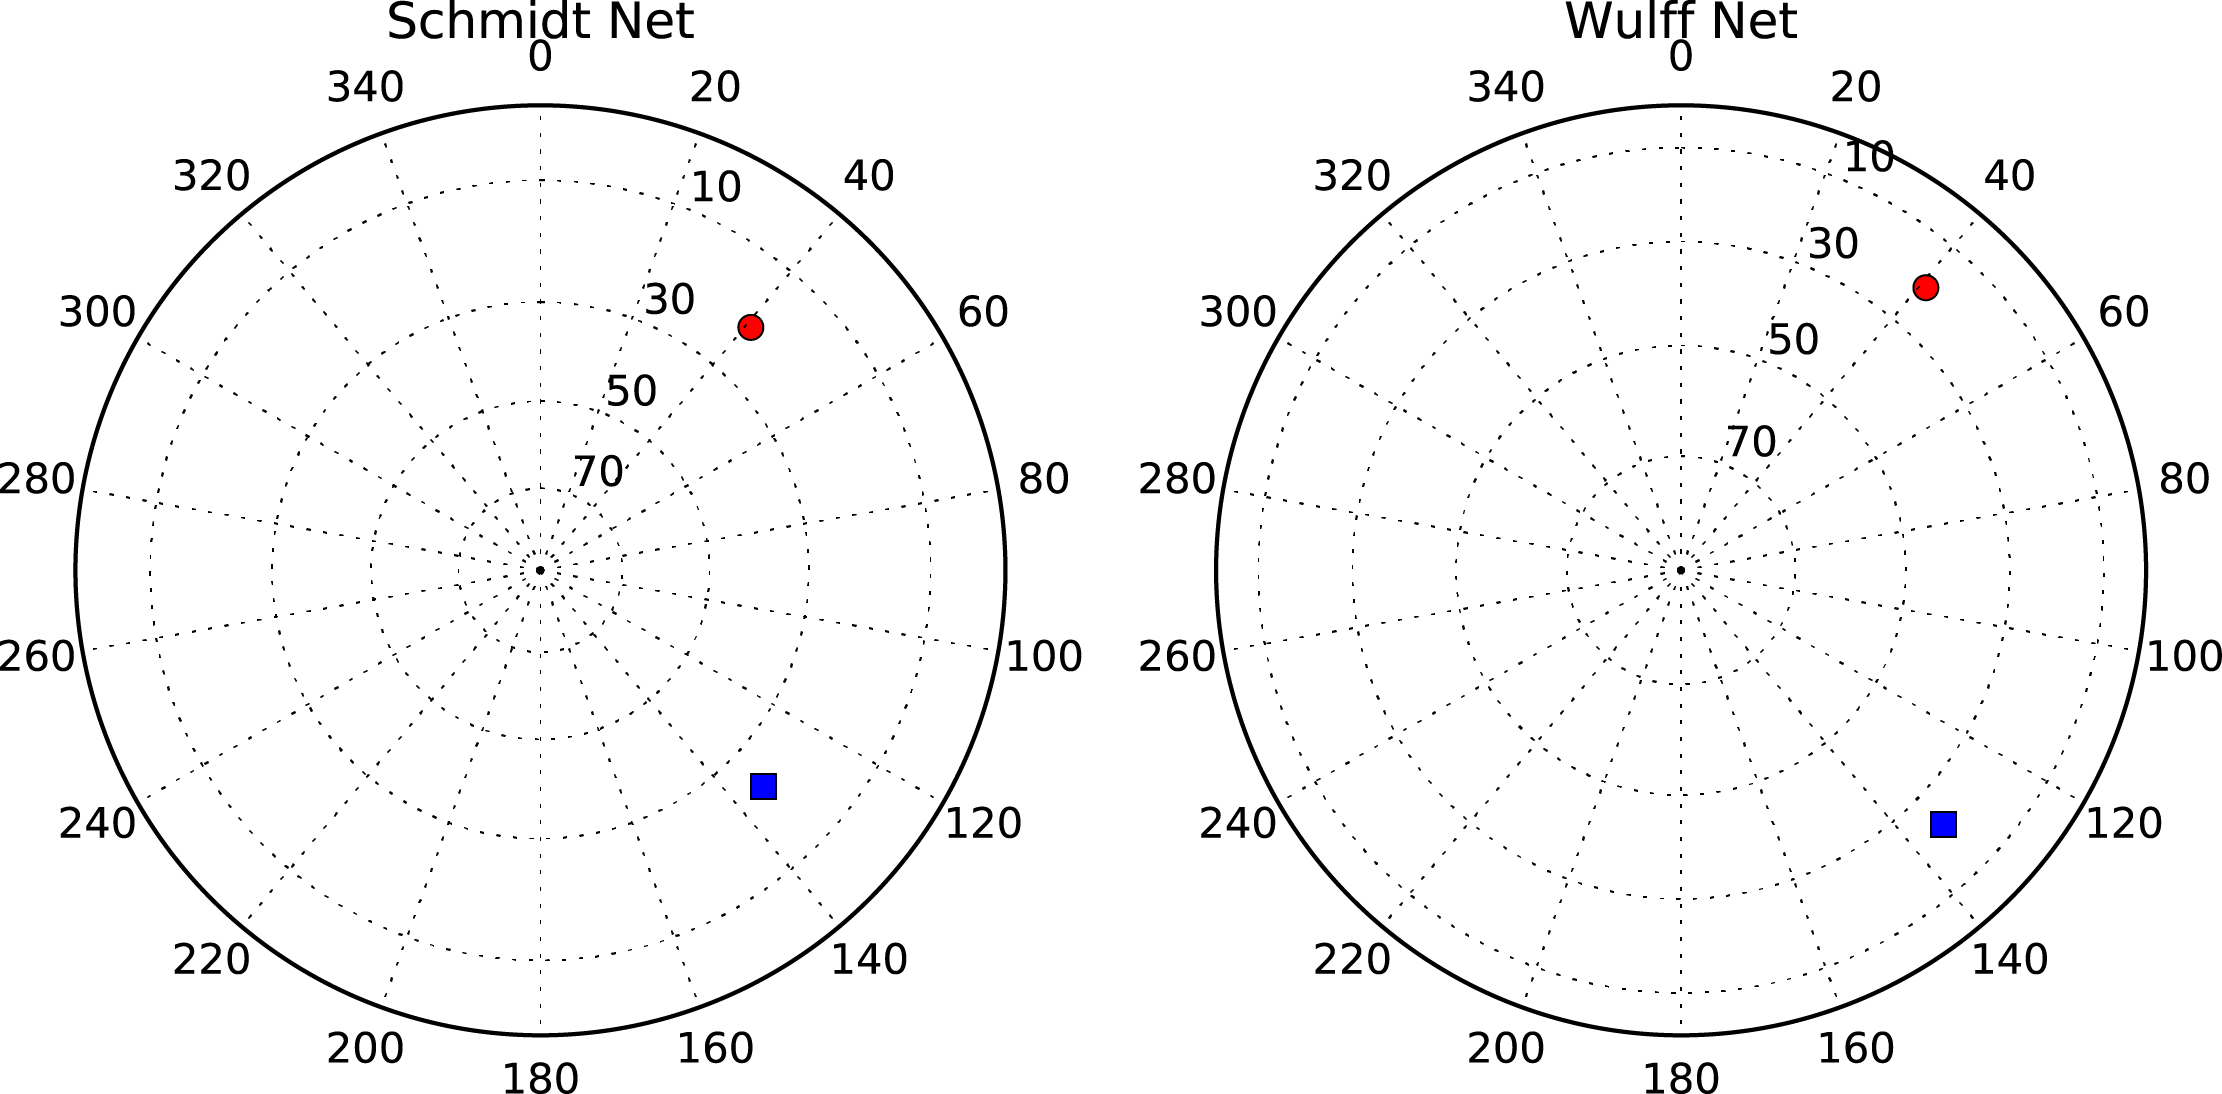

In [12]:
Image(filename='Figures/schmidt_wulff.png')

The outer rim of each diagram is the horizontal plane and the centers of the plots are the vertical direction (either down or up). By convention, up directions are plotted with open symbols and downward pointing symbols are solid.  

To read the azimuth of the blue square in the Schmidt net, just count around the outer rim. The azimuth of the red dot is about $40^{\circ}$.  The plunge you read by counting from the outer rim toward the center. So, the blue square has a  plunge of about 20$^{\circ}$.  Doing the same for the Wulff net, you should get the same direction, even though it looks a little different.  

Now we will learn how to make these plots.  If you look closely at the rose diagram, you will see that the bin count contours are equally spaced whereas in the Schmidt and Wulff projections, they are not.  The first is called a 'polar interval' projection as opposed to equal area or equal angle.  So we need to map the plunges from  equal intervals to the appropriate spacing for our desired projection.  It is just a bit of math.  

The math for the equal angle projection turns out to be:

map_pl=90  tan $({{(90-pl)}\over 2})$

and the same for the equal area projection is: 

map_pl =90 $\sqrt 2$ ${ \sin\bigr({{90-pl}\over {2}}\bigl)}$

Let's make two lambda functions - one (**EqualAngle**) which converts plunges using the equal angle mapping and the other (**EqualArea**) which does the same except for using the equal area mapping.  


In [13]:
# Here's the equal angle function
EqualAngle = lambda Pl: 90.*np.tan(np.radians(90.-Pl)/(2.))
# and the equal area function
EqualArea = lambda Pl: np.sqrt(2.)*90.*np.sin(np.radians(90.-Pl)/(2.))

We already have most of the tools we need to make this plot, but there are two more that will come in handy:  how to put on the plunge and azimuth contours (the dashed lines in the nets).  The radial lines required for marking contours are generated using the function 
**plt.thetagrids( )** which takes a list of azimuths (or thetas) and a list of their labels.
The contour lines for plunge are generated using 
**plt.rgrids( )** which takes a list of plunges (or radii) and their labels.   

So here we go:

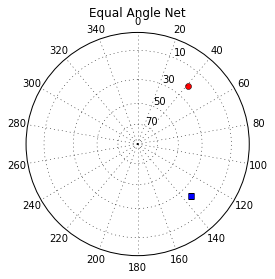

In [15]:
Azs=np.array([40.9,134.1]) # array of azimuths
Pls=np.array([20.7,22.5]) # array of corresponding plunges
# make a plot instance with polar axes
fig = plt.subplot(111, polar=True) 
# set the coordinates (like for rose diagrams)
fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
# for this we want the full 90 degrees, so set the scale
plt.polar([0],[90]) ## to scale grid
# plot the first direction as a red dot
plt.polar(np.radians(Azs)[0],(EqualAngle(Pls)[0]),'ro')
# plot the second direction as a blue square
plt.polar(np.radians(Azs)[1],(EqualAngle(Pls)[1]),'bs')

# make a list of contours to plot
# notice use of list comprehension
# label the azimuths at 20 degree intervals
AzContours=range(0,360,20)
AzLabels=[str(p) for p in AzContours]
plt.thetagrids(AzContours,AzLabels)

# and now the plunges
PlContours=[EqualAngle(a) for a in range(10,90,20)] ##don't include center or edge
# make a list of labels
PlLabels=[str(a) for a in range(10,90,20)]
# draw on the plunge contours and label them
plt.rgrids(PlContours,PlLabels)
# label the plot
plt.title('Equal Angle Net');


### Practice with equal angle nets
- Somebody measured the direction of the magnetic field at 33N and 117W for the last 10,000 years [ok not really but there are models of the secular variation of the field for this.]
- Read in the data file in Datasets/GeomagneticDirections/dec_inc.csv
- Plot the declination (dec) and inclination (inc) data on an equal angle net.  Declinations are azimuths and inclination are plunges.  

Let's do the same thing for an equal area plot.  The only difference is the mapping of plunges using the **EqualArea( )** function instead of **EqualAngle( )**.  

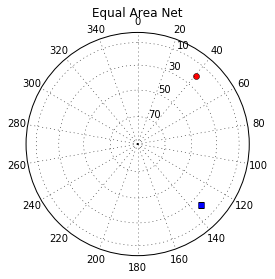

In [17]:
fig = plt.subplot(111, polar=True) # Specify polar axes

fig.set_theta_direction(-1) # Reverse direction of degrees (CW)
fig.set_theta_zero_location("N") # Specify 0-degrees as North
plt.polar([0],[90]) ## to scale grid
plt.polar(np.radians(Azs)[0],EqualArea(Pls)[0],'ro')
plt.polar(np.radians(Azs)[1],EqualArea(Pls)[1],'bs')
AzContours=range(0,360,20)
AzLabels=[str(p) for p in AzContours]
plt.thetagrids(AzContours,AzLabels)
PlContours=[EqualArea(a) for a in range(10,90,20)]
PlLabels=[str(a) for a in range(10,90,20)]
plt.rgrids(PlContours,PlLabels)
plt.title('Equal Area Net');

### Practice with Equal Area Nets
- Read in the data file in Datasets/GeomagneticDirections/dec_inc.csv
- Plot the declination (dec) and inclination (inc) data on an Equal Area net. 